# US Baby Names 1880-2010

# Since the data set is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. This is easy to do using pandas.concat:

In [2]:
import pandas as pd
import csv

years = range(1880, 2011)

pieces = []
columns = ['name','sex','birth']

for year in years:
    path = 'yob%d.txt'%year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [3]:
names = pd.concat(pieces, ignore_index=True)
# There are a couple things to note here. First, remember that concat glues the DataFrame
# objects together row-wise by default. Secondly, you have to pass ignore_index=True
# because we’re not interested in preserving the original row numbers returned from
# read_csv. So we now have a very large DataFrame containing all of the names data:

In [4]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


## With this data in hand, we can already start aggregating the data at the year and sex level using groupby or pivot_table

In [5]:
total_birth = names.pivot_table(values='birth',index='year',columns='sex',aggfunc='sum')

In [6]:
total_birth

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112321,104625
1884,129019,114442
...,...,...
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947


In [7]:
# the same above thing can be done using groupby

In [8]:
total_birth_groupby = names.groupby(['year','sex'])['birth'].sum().unstack()

In [9]:
total_birth_groupby

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112321,104625
1884,129019,114442
...,...,...
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

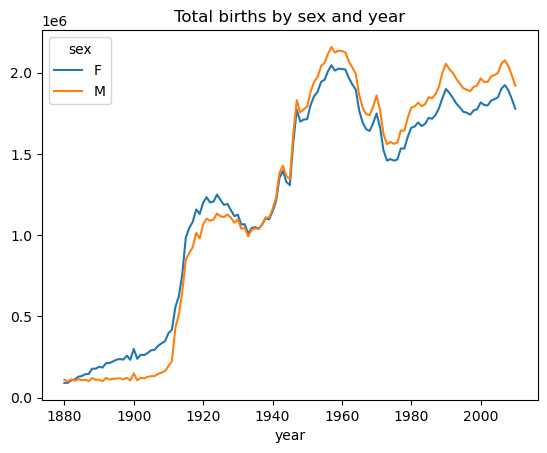

In [10]:
total_birth.plot(title='Total births by sex and year')

In [14]:
names['prop'] = (
    names['birth']
    / names.groupby(['year', 'sex'])['birth'].transform('sum')
)

In [15]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692627,Zymaire,M,5,2010,0.000003
1692628,Zyonne,M,5,2010,0.000003
1692629,Zyquarius,M,5,2010,0.000003
1692630,Zyran,M,5,2010,0.000003


In [16]:
import numpy as np

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

# Where:

# prop = proportion of births for that name

# For each (year, sex) group, the sum of prop should be 1

# Example:

# All female names in 1880 → their prop values should add up to 1

# All male names in 1880 → their prop values should add up to 1

True

## Now that this is done, I’m going to extract a subset of the data to facilitate further analysis: the top 1000 names for each sex/year combination. This is yet another group operation

In [26]:
top1000 = (
    names
    .sort_values('birth', ascending=False)
    .groupby(['year', 'sex'])
    .head(1000)
)

In [27]:
top1000

,name,sex,birth,year,prop
431068,Linda,F,99693,1947,0.056236
441439,Linda,F,96216,1948,0.056668
437172,James,M,94763,1947,0.051795
544684,Michael,M,92786,1957,0.043010
437173,Robert,M,91654,1947,0.050096
...,...,...,...,...,...
28033,Magnus,M,5,1891,0.000049
28034,Malachi,M,5,1891,0.000049
28035,May,M,5,1891,0.000049
28036,Mckinley,M,5,1891,0.000049


# Analyzing Naming Trends

# Let’s form a pivot table of the total number of births by year and name:

In [32]:
total_birth = top1000.pivot_table('birth',index='year',columns='name',aggfunc='sum')

In [33]:
total_birth

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,5.0,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,5.0,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3745.0,NaN,8309.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2858.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3960.0,NaN,8947.0,NaN,NaN,314.0,NaN,349.0,469.0,...,NaN,4937.0,3044.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,958.0,4045.0,219.0,8545.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3449.0,494.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

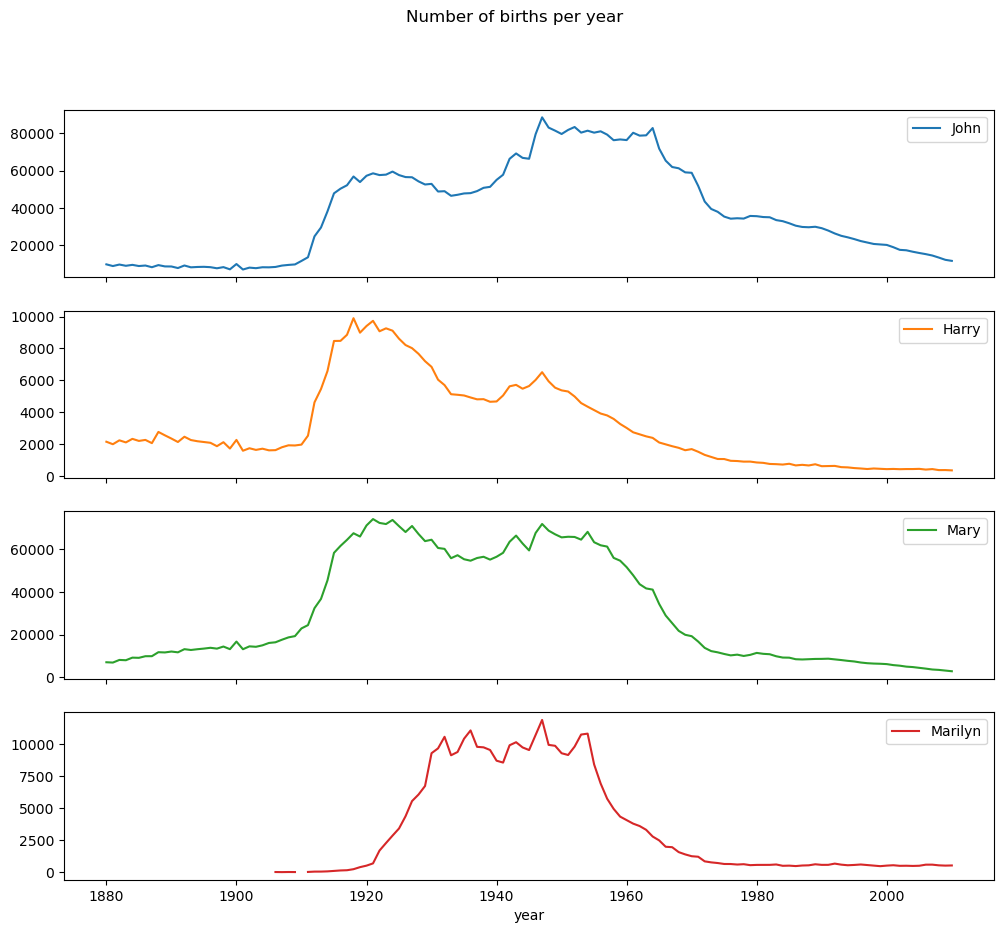

In [35]:
subset = total_birth[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

# Measuring the increase in naming diversity